<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Regresi%C3%B3n_b%C3%A1sica_Ejercicio_de_Regresi%C3%B3n_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio de Regresión 1 (Core)**
**Objetivo**

Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

**Descripción del problema:** Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

**Instrucciones:**

1. **Carga de datos:** Descarga el archivo de datos [house_prices.csv](https://github.com/ywchiu/riii/blob/master/data/house-prices.csv) que contiene las siguientes columnas:
* SqFt: Tamaño de la casa en pies cuadrados.
* Bedrooms: Número de habitaciones.
* Bathrooms: Número de baños.
* price: Precio de venta de la casa.
2. **Exploración de datos:** Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.
3. **Preparación de datos:** Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
4. **Entrenamiento del modelo:** Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
5. **Evaluación del modelo:** Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.
6. **Predicción:** Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
* Tamaño: 2000 pies cuadrados
* Habitaciones: 3
* Baños: 2







Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None

Estadísticas descriptivas:
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25

<Figure size 1200x1000 with 0 Axes>

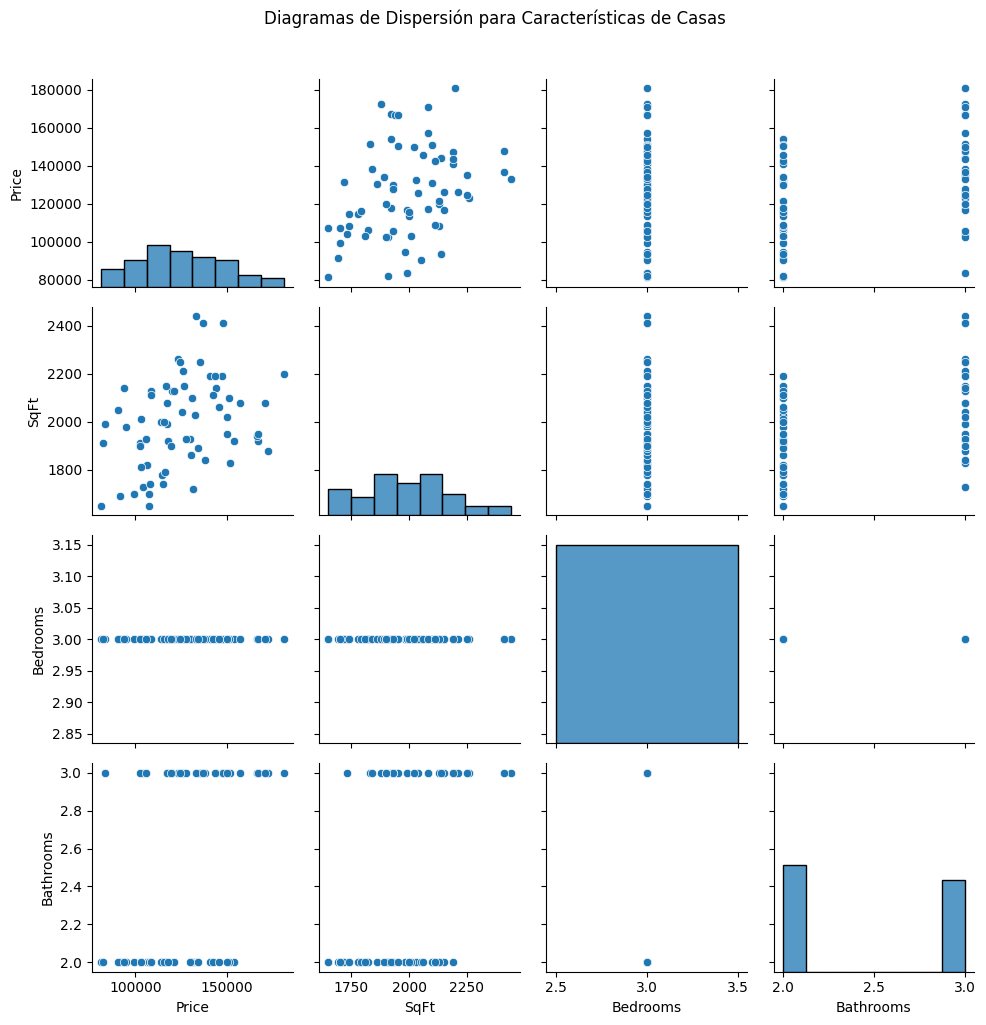


Resultados del modelo:
Error cuadrático medio (MSE): 217240773.01
R-cuadrado (R²): 0.2500

Coeficientes del modelo:
SqFt: 12.34
Bedrooms: 0.00
Bathrooms: 16673.51
Intercepto: 61492.57

Precio predicho para la casa nueva: $119,522.38


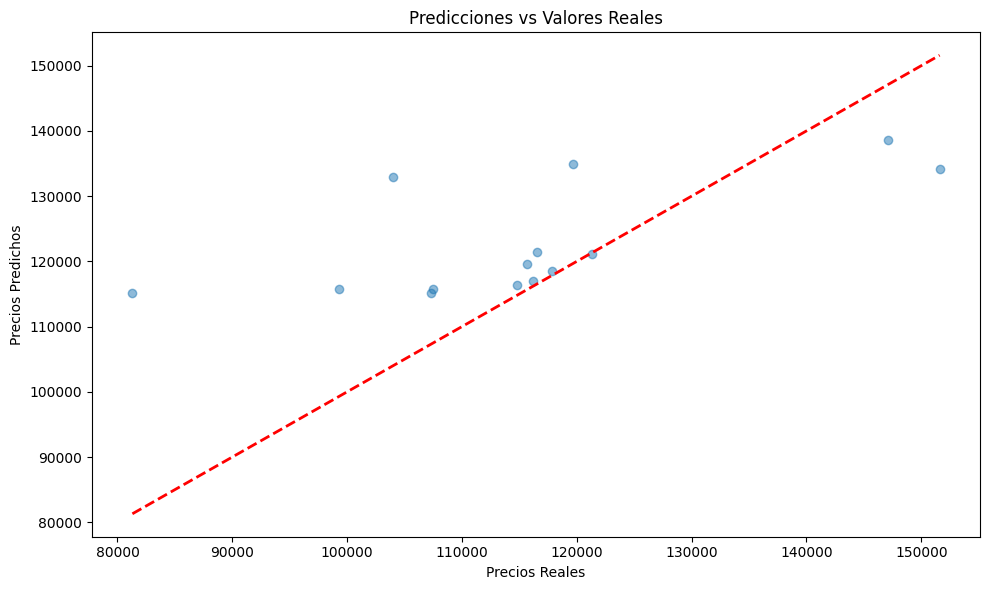

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
url = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/house-prices.csv"
df = pd.read_csv(url)

# 2. Exploración de datos
print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())

# Verificar valores duplicados
n_duplicados = df.duplicated().sum()
print(f"Número de duplicados: {n_duplicados}")
df = df.drop_duplicates()
print(f"Dimensiones del dataset después de eliminar duplicados: {df.shape}")

# Identificación de outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
numerical_columns = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms']
outlier_indices = identify_outliers_iqr(df, numerical_columns)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

# Eliminar outliers
df = df.drop(index=outlier_indices)
print(f"Dimensiones del dataset después de eliminar outliers: {df.shape}")

# Visualización de relaciones entre características
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Price', 'SqFt', 'Bedrooms', 'Bathrooms']])
plt.suptitle('Diagramas de Dispersión para Características de Casas', y=1.02)
plt.tight_layout()
plt.show()

# 3. Preparación de datos
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluación del modelo
y_pred = model.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"R-cuadrado (R²): {r2:.4f}")

# Coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(['SqFt', 'Bedrooms', 'Bathrooms'], model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")

# 6. Predicción para el caso específico
nueva_casa = pd.DataFrame([[2000, 3, 2]], columns=['SqFt', 'Bedrooms', 'Bathrooms'])
precio_predicho = model.predict(nueva_casa)[0]
print(f"\nPrecio predicho para la casa nueva: ${precio_predicho:,.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.title('Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()

